Evaluating SVM on Original Iris Dataset
Iris - Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        29
  Versicolor       1.00      1.00      1.00        23
   Virginica       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

Iris - Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]
Iris - Accuracy: 1.0
Evaluating SVM on Original Heart Disease Dataset
Heart Disease - Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        70
           1       0.82      0.82      0.82        82

    accuracy                           0.80       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.80      0.80      0.80       152

Heart Disease - Confusion Matrix:
 [[55 15]
 [15

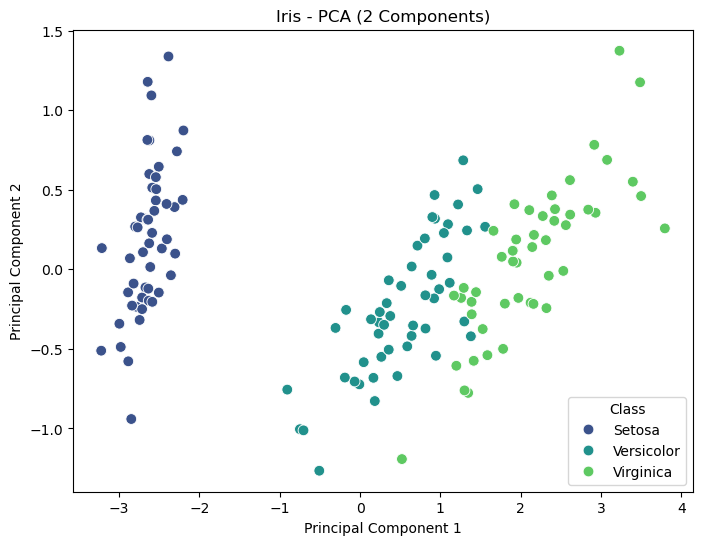

Applying PCA on Heart Disease Dataset
Heart Disease - Explained Variance by Principal Components: [0.7475642  0.15037022]


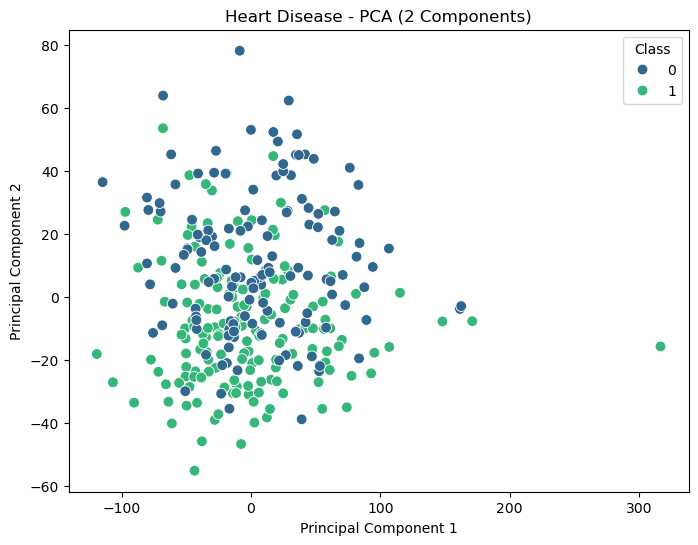

Evaluating SVM on PCA-Reduced Iris Dataset
PCA-Reduced Iris - Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        29
  Versicolor       0.92      1.00      0.96        23
   Virginica       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75

PCA-Reduced Iris - Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
PCA-Reduced Iris - Accuracy: 0.9733333333333334
Evaluating SVM on PCA-Reduced Heart Disease Dataset
PCA-Reduced Heart Disease - Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.59      0.64        70
           1       0.69      0.79      0.74        82

    accuracy                           0.70       152
   macro avg       0.70      0.69      0.69       152
weighted avg       0.70      0.70 

In [10]:
# Use the Iris and Heart Disease databases to perform the following:
#  1. Perform classification tasks with 50%-50% training and testing using the SVM
#  classifier.
#  2. Apply PCA to the dataset.
#  3. Perform classification with 50%-50% training and testing on:
#  • 1st PCA component
#  • 2nd PCA component


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess data
def preprocess_data(file_path, target_column):
    data = pd.read_csv(file_path)
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return X, y

# Function to split data
def split_data(X, y, test_size=0.5):
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Function to train and evaluate SVM model
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, dataset_name):
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{dataset_name} - Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{dataset_name} - Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{dataset_name} - Accuracy: {accuracy_score(y_test, y_pred)}")

# Function to apply PCA and plot the results
def apply_pca_and_plot(X, y, dataset_name, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    explained_variance = pca.explained_variance_ratio_
    print(f"{dataset_name} - Explained Variance by Principal Components: {explained_variance}")
    
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', s=60)
        plt.title(f"{dataset_name} - PCA (2 Components)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend(title="Class")
        plt.show()
    return X_pca

# Paths to datasets and target columns
iris_file = 'C:/Users/HP/OneDrive/Desktop/ml 7th sem codes/datasets/iris.csv'
heart_file = 'C:/Users/HP/OneDrive/Desktop/ml 7th sem codes/datasets/heart.csv'  # Update path
iris_target = 'variety'
heart_target = 'target'

# Process Iris dataset
X_iris, y_iris = preprocess_data(iris_file, iris_target)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = split_data(X_iris, y_iris)

# Process Heart Disease dataset
X_heart, y_heart = preprocess_data(heart_file, heart_target)
X_train_heart, X_test_heart, y_train_heart, y_test_heart = split_data(X_heart, y_heart)

# Train and evaluate SVM for original datasets
print("Evaluating SVM on Original Iris Dataset")
train_and_evaluate_svm(X_train_iris, X_test_iris, y_train_iris, y_test_iris, "Iris")

print("Evaluating SVM on Original Heart Disease Dataset")
train_and_evaluate_svm(X_train_heart, X_test_heart, y_train_heart, y_test_heart, "Heart Disease")

# Apply PCA and evaluate SVM for PCA-reduced datasets
print("Applying PCA on Iris Dataset")
X_pca_iris = apply_pca_and_plot(X_iris, y_iris, "Iris")
X_train_iris_pca, X_test_iris_pca, y_train_iris_pca, y_test_iris_pca = split_data(X_pca_iris, y_iris)

print("Applying PCA on Heart Disease Dataset")
X_pca_heart = apply_pca_and_plot(X_heart, y_heart, "Heart Disease")
X_train_heart_pca, X_test_heart_pca, y_train_heart_pca, y_test_heart_pca = split_data(X_pca_heart, y_heart)

print("Evaluating SVM on PCA-Reduced Iris Dataset")
train_and_evaluate_svm(X_train_iris_pca, X_test_iris_pca, y_train_iris_pca, y_test_iris_pca, "PCA-Reduced Iris")

print("Evaluating SVM on PCA-Reduced Heart Disease Dataset")
train_and_evaluate_svm(X_train_heart_pca, X_test_heart_pca, y_train_heart_pca, y_test_heart_pca, "PCA-Reduced Heart Disease")
